<a href="https://colab.research.google.com/github/Arjun-08/Meta-Analysis-on-Impact-of-Maternal-Nutrition-on-Low-Birth-Weight-in-Developing-Countries/blob/main/Final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

META REGRESSION OF HAEMOGLOBIN ON LOW BIRTH EFFECT

In [ ]:
import numpy as np
import statsmodels.api as sm

# Example data (replace with your own)
effect_sizes = np.array([2.58, 3.89, 4.51, 1.09, 1.20, 1.06, 2.73, 3.97])
sample_size= np.array([161, 66, 162, 90076, 187, 87, 39, 65])
Duration = np.array([38, 1095, 365, 1095, 242, 61, 93, 365])
studyID = np.array([36037087, 31443690, 37288213, 37123748, 35938121, 35836138, 37457158, 36937486])

# Combine covariates into a design matrix
X = np.column_stack((sample_size, Duration, studyID))

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the meta-regression model
model = sm.OLS(effect_sizes, X)
results = model.fit()

# Print regression summary
print(results.summary())

print("P-values:")
for i, covariate in enumerate(['Intercept','sample_size', 'Duration', 'studyID']):
    print(f"{covariate}: {results.pvalues[i]}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     4.411
Date:                Fri, 15 Mar 2024   Prob (F-statistic):             0.0928
Time:                        17:05:22   Log-Likelihood:                -7.6937
No. Observations:                   8   AIC:                             23.39
Df Residuals:                       4   BIC:                             23.71
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.8847     11.702     -2.212      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


SCATTER PLOT OF META REGRESSION OF HAEMOGLOBIN ON LOW BIRTH EFFECT

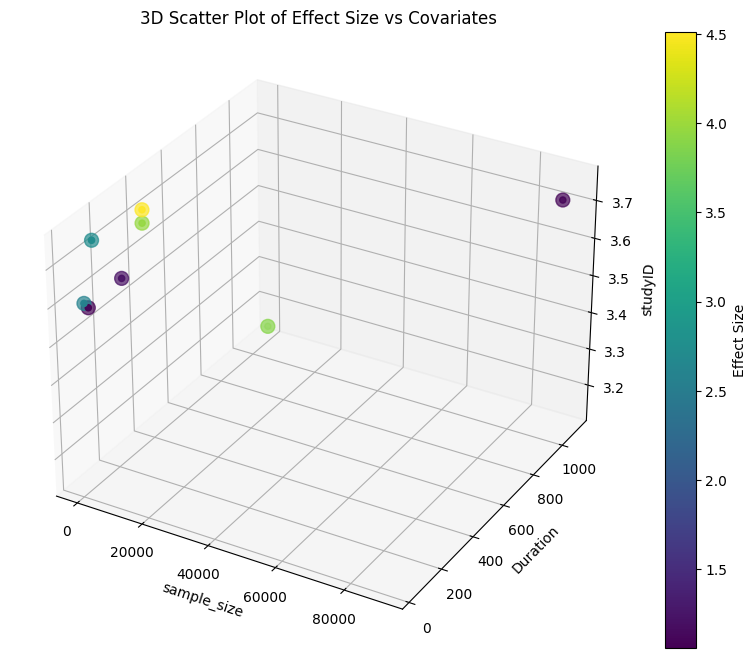

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your own)
effect_sizes = np.array([2.58, 3.89, 4.51, 1.09, 1.20, 1.06, 2.73, 3.97])
sample_size= np.array([161, 66, 162, 90076, 187, 87, 39, 65])
Duration = np.array([38, 1095, 365, 1095, 242, 61, 93, 365])
studyID = np.array([36037087, 31443690, 37288213, 37123748, 35938121, 35836138, 37457158, 36937486])

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(sample_size, Duration, studyID , c=effect_sizes, cmap='viridis', s=100, alpha=0.7)

# Labels
ax.set_xlabel('sample_size')
ax.set_ylabel('Duration')
ax.set_zlabel('studyID')
ax.set_title('3D Scatter Plot of Effect Size vs Covariates')

# Add color bar
cbar = plt.colorbar(ax.scatter(sample_size, Duration, studyID, c=effect_sizes, cmap='viridis'))
cbar.set_label('Effect Size')

plt.show()


META REGRESSION OF HAEMOGLOBIN ON LOW BIRTH EFFECT


In [ ]:
#compute standard error
import math

def compute_standard_error(effect_sizes, sample_sizes):

    standard_errors = []
    for effect_size, sample_size in zip(effect_sizes, sample_sizes):
        standard_error = effect_size / math.sqrt(sample_size)
        standard_errors.append(standard_error)
    return standard_errors

# Example usage:
effect_sizes = [2.58, 3.89, 4.51, 1.09, 1.20, 1.06, 2.73, 3.97]
sample_sizes = [161, 66, 162, 90076, 187, 87, 39, 65]

standard_errors = compute_standard_error(effect_sizes, sample_sizes)

for i, se in enumerate(standard_errors):
    print(f"Study {i+1}: Standard Error = {se}")


Study 1: Standard Error = 0.20333248480968796
Study 2: Standard Error = 0.47882589990960434
Study 3: Standard Error = 0.35433906479459215
Study 4: Standard Error = 0.003631800230156307
Study 5: Standard Error = 0.08775269089525567
Study 6: Standard Error = 0.11364392869280625
Study 7: Standard Error = 0.43714985988788785
Study 8: Standard Error = 0.4924178963191576


In [ ]:
import numpy as np
import statsmodels.api as sm


log_or = np.array([2.58, 3.89, 4.51, 1.09, 1.20, 1.06, 2.73, 3.97]) # effect sizes

se_log_or = np.array([0.20415467159765388,
 0.4748539735707475,
 0.3549092092375468,
 0.0036404872190515716,
 0.08709877432424935,
 0.11206507098323593,
 0.1691980185577489,
 0.49489102004551745]
)                                                    # standard errors

# Egger's test
X = sm.add_constant(1/se_log_or)
model = sm.OLS(log_or, X).fit()
intercept, slope = model.params
p_value = model.pvalues[1]  # P-value corresponding to the slope

print(f"Egger's test p-value: {p_value}")



Egger's test p-value: 0.2376543252464296


META REGRESSION OF IFA ON LOW BIRTH EFFECT

In [ ]:
import numpy as np
import statsmodels.api as sm

# Example data (replace with your own)
effect_sizes = np.array([3.90, 6.09, 8.35, 0.14, 27.50])
sample_size = np.array([400, 900, 252, 220, 25])
#Duration = np.array([38, 365, 93, 365, 28])
StudyID = np.array([36037087, 37288213, 37457158, 36937486, 30813968])
age = np.array([26, 27, 28, 26, 27])

# Combine covariates into a design matrix
X = np.column_stack((sample_size, StudyID, age))

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the meta-regression model
model = sm.OLS(effect_sizes, X)
results = model.fit()

# Print regression summary
print(results.summary())

# Print p-values
print("\nP-values:")
for i, covariate in enumerate(['Intercept', 'sample_size', 'StudyID', 'age']):
    print(f"{covariate}: {results.pvalues[i]}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6034.
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00946
Time:                        17:02:53   Log-Likelihood:                 6.1353
No. Observations:                   5   AIC:                            -4.271
Df Residuals:                       1   BIC:                            -5.833
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7099      2.775      2.058      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


SCATTER PLOT OF META REGRESSION OF IFA ON LOW BIRTH EFFECT

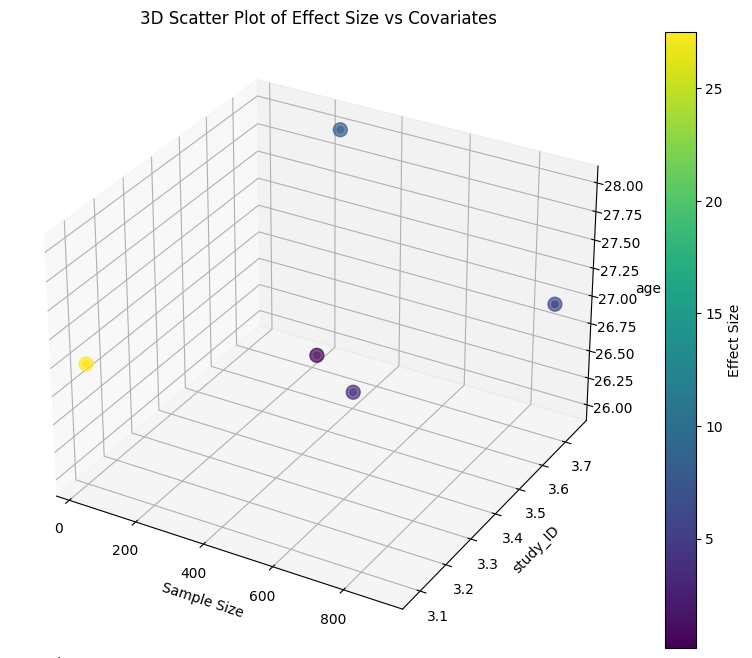

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated example data
effect_sizes = np.array([3.90, 6.09, 8.35, 0.14, 27.50])
sample_size = np.array([400, 900, 252, 220, 25])
StudyID = np.array([36037087, 37288213, 37457158, 36937486, 30813968])
age = np.array([26, 27, 28, 26, 27])
#Duration = np.array([38, 365, 93, 365, 28])


# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(sample_size, StudyID, age, c=effect_sizes, cmap='viridis', s=100, alpha=0.7)

# Labels
ax.set_xlabel('Sample Size')
ax.set_ylabel('study_ID')
ax.set_zlabel('age')
ax.set_title('3D Scatter Plot of Effect Size vs Covariates')

# Add color bar
cbar = plt.colorbar(ax.scatter(sample_size, StudyID, age, c=effect_sizes, cmap='viridis'))
cbar.set_label('Effect Size')

plt.show()


EGGER's REGRESSION OF IFA ON LOW BIRTH EFFECT

In [ ]:
#compute standard error
import math

def compute_standard_error(effect_sizes, sample_sizes):

    standard_errors = []
    for effect_size, sample_size in zip(effect_sizes, sample_sizes):
        standard_error = effect_size / math.sqrt(sample_size)
        standard_errors.append(standard_error)
    return standard_errors

# Example usage:
effect_sizes = [2.84, 2.80, 2.92, 0.25, 5.08]
sample_sizes = [400, 900,  252, 220, 25]

standard_errors = compute_standard_error(effect_sizes, sample_sizes)

for i, se in enumerate(standard_errors):
    print(f"Study {i+1}: Standard Error = {se}")


Study 1: Standard Error = 0.142
Study 2: Standard Error = 0.09333333333333332
Study 3: Standard Error = 0.1839427101978239
Study 4: Standard Error = 0.016854996561581053
Study 5: Standard Error = 1.016


In [ ]:
import numpy as np
import statsmodels.api as sm


log_or = np.array([3.90, 6.09, 8.35, 0.14, 27.50]) # effect sizes (log odds ratios)

se_log_or = np.array([0.142, 0.093, 0.184, 0.017, 1.016]) # standard errors


se_log_or[se_log_or == 0] = 1e-6

# Egger's test
X = sm.add_constant(1/se_log_or)
model = sm.OLS(log_or, X).fit()
intercept, slope = model.params
p_value = model.pvalues[1]  # P-value corresponding to the slope

print(f"Egger's test p-value: {p_value}")


Egger's test p-value: 0.30598672555289025
